In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')
df['median_income'] *= 10000
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,38835.781000,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,19081.565184,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,4999.000000,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,25663.750000,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,35446.000000,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,47670.000000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,150001.000000,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

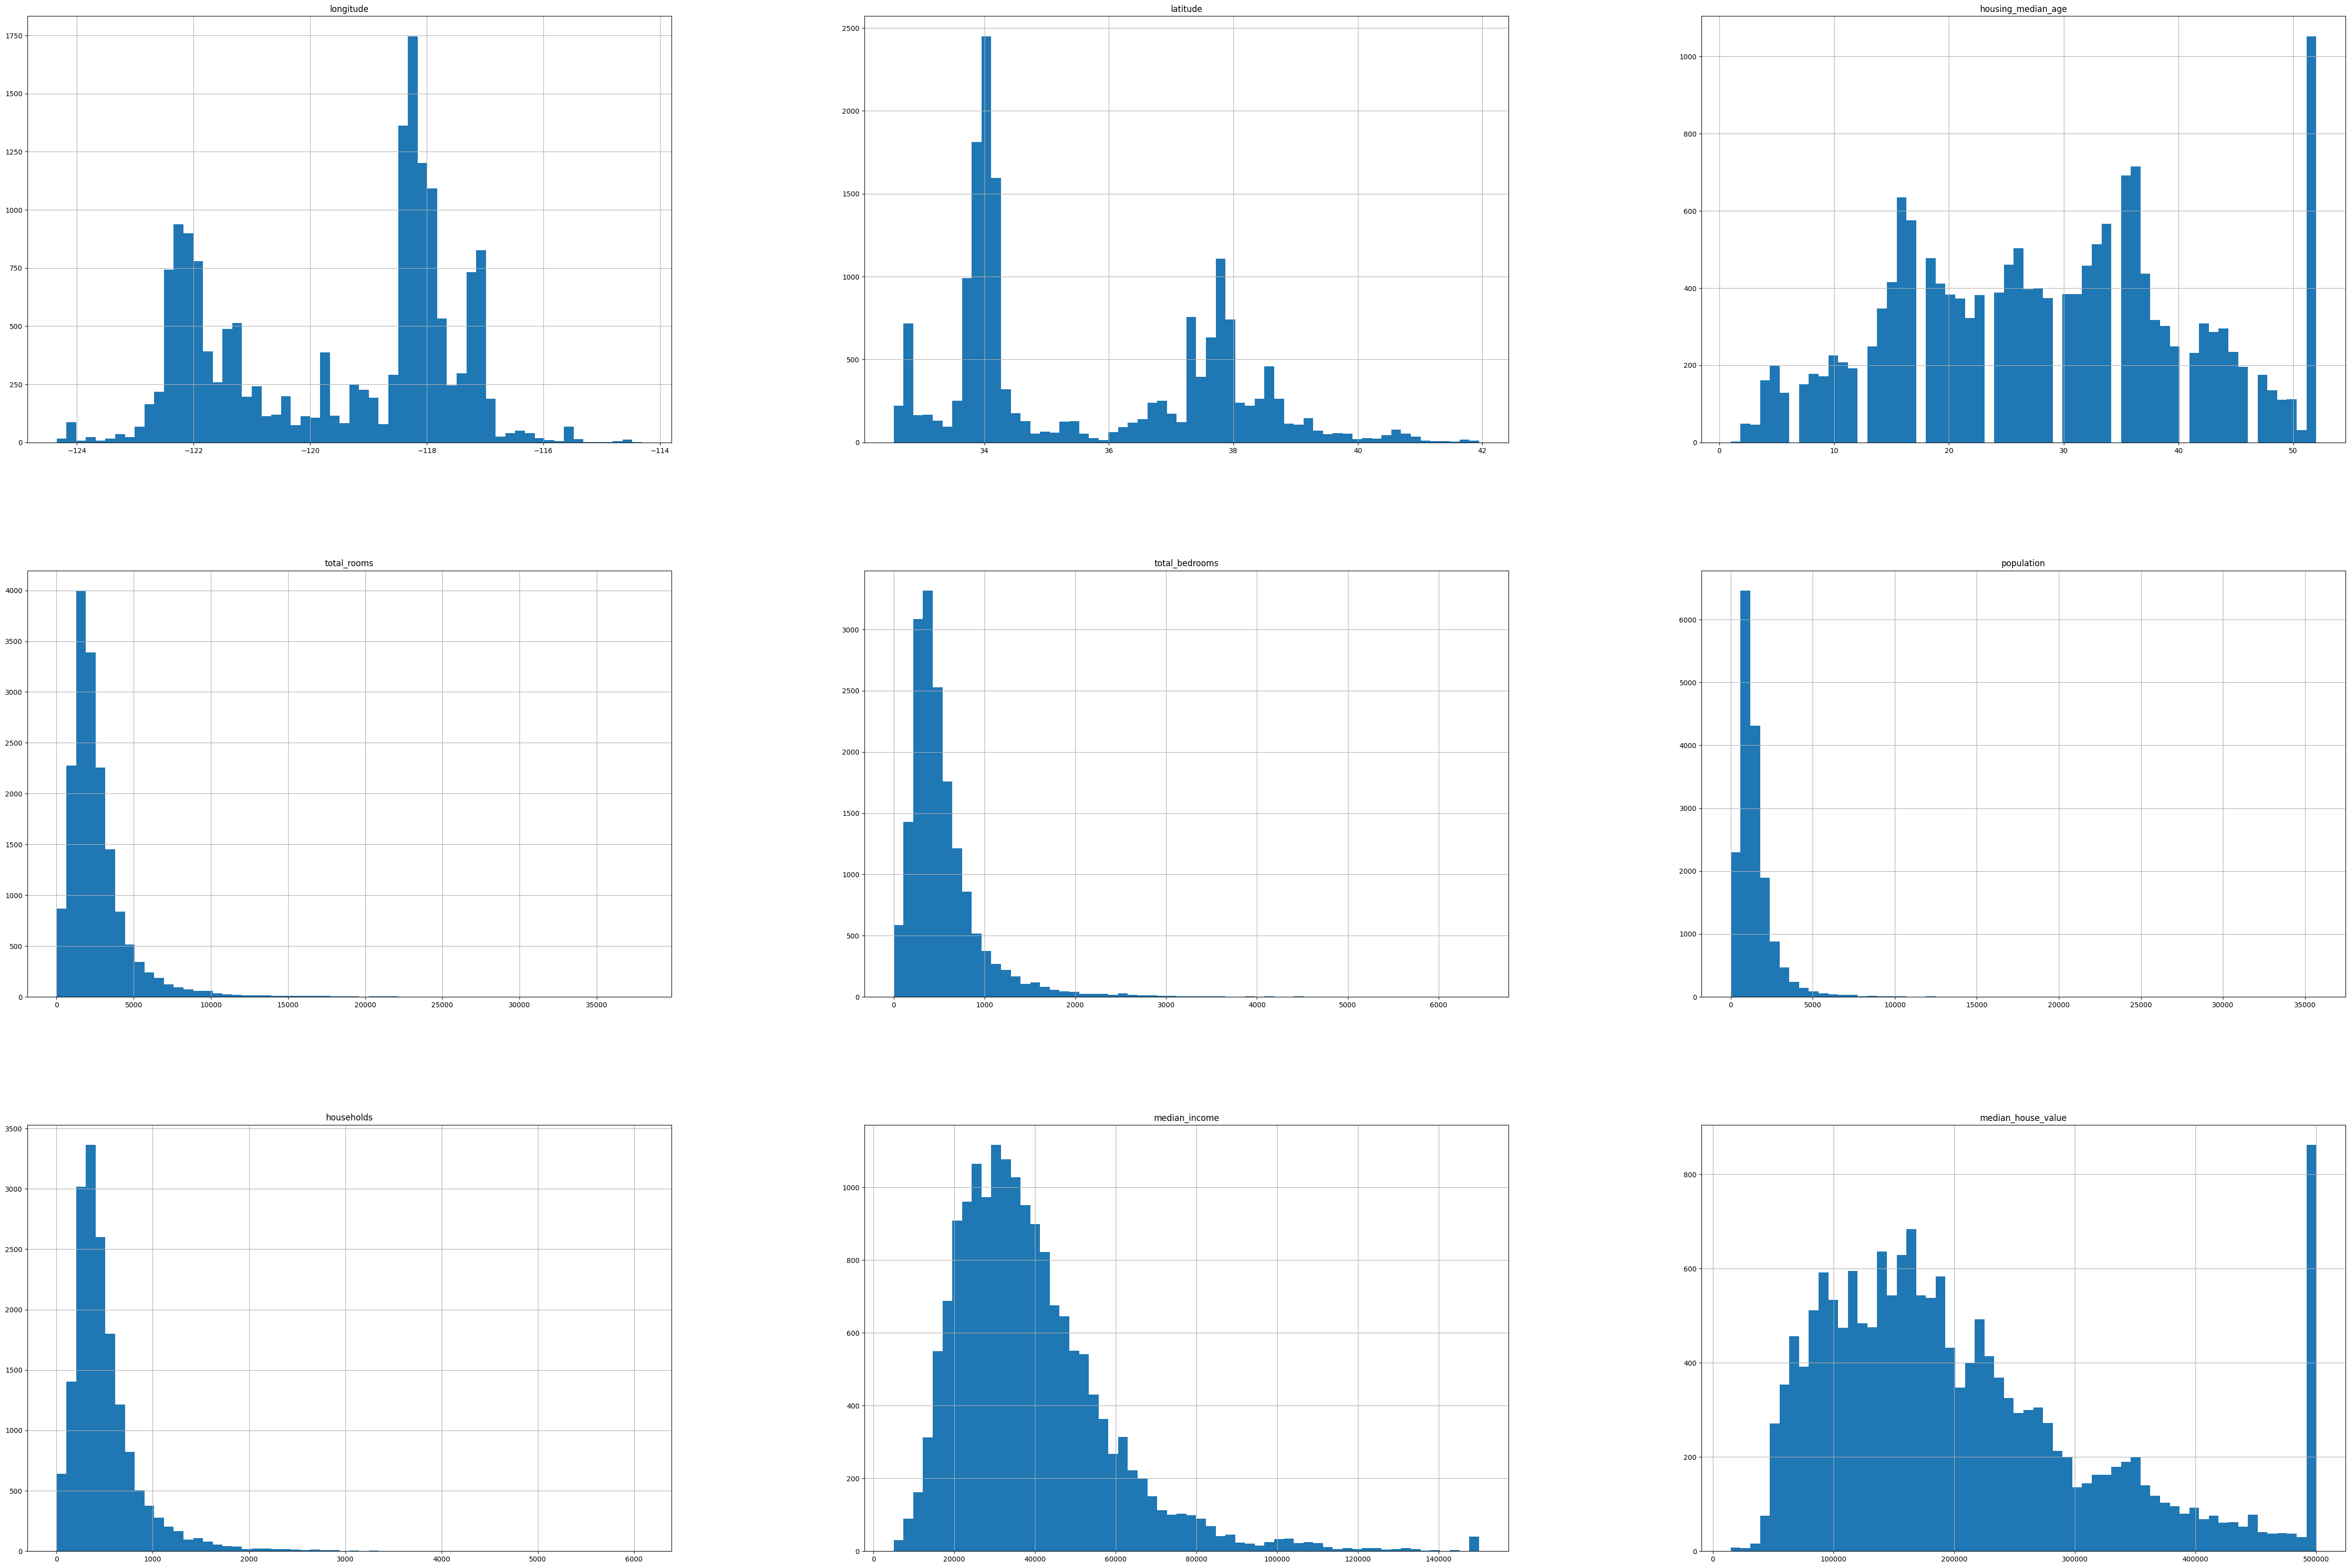

In [ ]:
df.hist(bins=60, figsize=(60, 40))

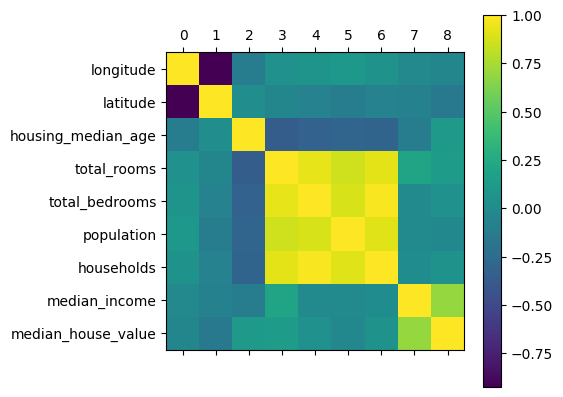

In [ ]:
plt.matshow(df.corr())
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

0.6918706037806676


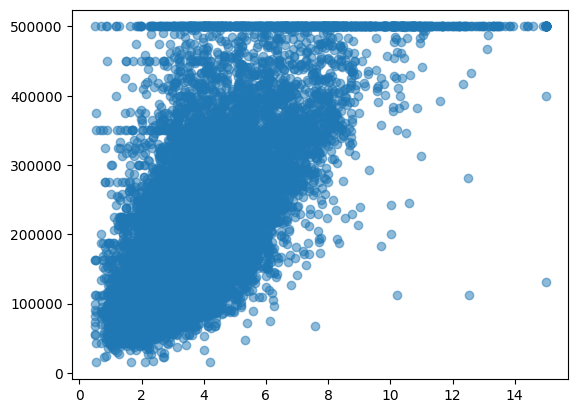

In [ ]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
print(df.corr()['median_income']['median_house_value'])

видно, что доход и стоимость дома соотносятся слабо

0.9190182976946508


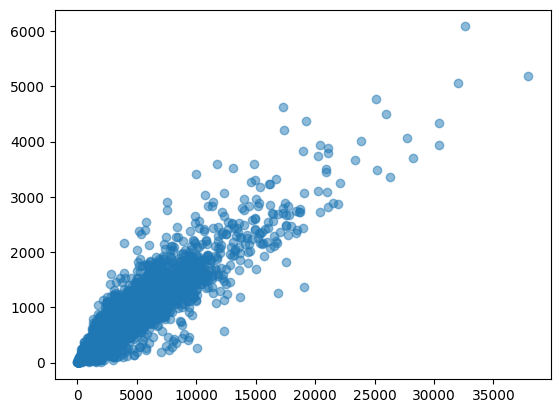

In [ ]:
plt.scatter(df['total_rooms'], df['households'], alpha=0.5)
print(df.corr()['total_rooms']['households'])

0.9284029878168417


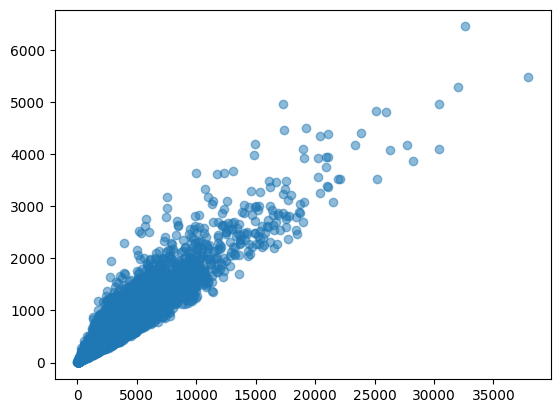

In [ ]:
plt.scatter(df['total_rooms'], df['total_bedrooms'], alpha=0.5)
print(df.corr()['total_rooms']['total_bedrooms'])

0.8601703408101828


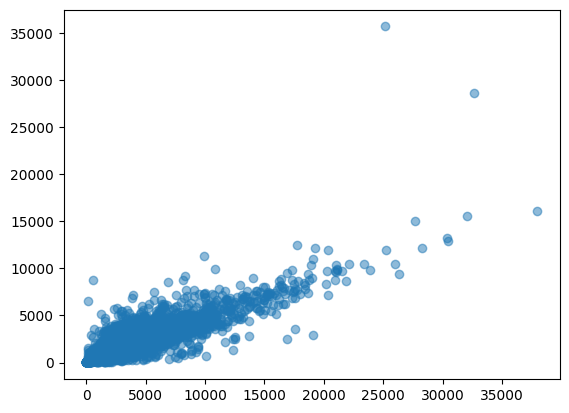

In [ ]:
plt.scatter(df['total_rooms'], df['population'], alpha=0.5)
print(df.corr()['total_rooms']['population'])

In [ ]:
class LSM:
    def __init__(self, col_names: list[str]):
        self.col_names = col_names

    @staticmethod
    def _prepend_ones(x):
        return np.concatenate((np.ones((len(x), 1)), x), axis=1)

    @staticmethod
    def sum_of_squares(true_y, pred_y):
        return np.sum(np.square(true_y - pred_y))

    @staticmethod
    def determination_coefficient(true_y, pred_y):
        mean_y = np.mean(true_y)
        rss = np.sum(np.square(true_y - pred_y))
        tss = np.sum(np.square(true_y - mean_y))

        return 1 - rss / tss

    def train(self, x: pd.DataFrame, y: pd.Series):
        x = LSM._prepend_ones(np.array(x[self.col_names]))
        y = np.array(y)
        self.b = np.linalg.inv((x.T @ x)) @ x.T @ y

    def pred(self, x: pd.DataFrame) -> list[float]:
        return np.array(LSM._prepend_ones(x[self.col_names])) @ self.b.T

тестовые и тренировочные данные для денежной зависимости

In [ ]:
train_percent = 0.7
random_state = 6546546

train = df.sample(frac=train_percent, random_state=random_state)
test = df.drop(train.index)
train_x = train.drop('median_house_value', axis=1)
train_y = train['median_house_value']
test_x = test.drop('median_house_value', axis=1)
test_y = test['median_house_value']

модель по всем признакам

In [ ]:
lsm = LSM(train_x.columns)
lsm.train(train_x, train_y)
pred_y = lsm.pred(test_x)
print('Коэффициент детерминации:', LSM.determination_coefficient(test_y, pred_y))
print('Сумма квадратов:', LSM.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.6557894510208544
Сумма квадратов: 24046204638875.535


модель только по median_income (доход)

In [ ]:
lsm = LSM(['median_income'])
lsm.train(train_x, train_y)
pred_y = lsm.pred(test_x)
print('Коэффициент детерминации:', LSM.determination_coefficient(test_y, pred_y))
print('Сумма квадратов:', LSM.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.4969783417731215
Сумма квадратов: 35140589872633.05


тестовые и тренировочные данные для зависимости количества комнат

In [ ]:
train_percent = 0.7
random_state = 6546546

train = df.sample(frac=train_percent, random_state=random_state)
test = df.drop(train.index)
train_x = train.drop('total_rooms', axis=1)
train_y = train['total_rooms']
test_x = test.drop('total_rooms', axis=1)
test_y = test['total_rooms']

модель по всем признакам

In [ ]:
lsm = LSM(train_x.columns)
lsm.train(train_x, train_y)
pred_y = lsm.pred(test_x)
print('Коэффициент детерминации:', LSM.determination_coefficient(test_y, pred_y))
print('Сумма квадратов:', LSM.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.9286063282524442
Сумма квадратов: 1686390448.8152094


модель по total_bedrooms (спальням)

In [ ]:
lsm = LSM(['total_bedrooms'])
lsm.train(train_x, train_y)
pred_y = lsm.pred(test_x)
print('Коэффициент детерминации:', LSM.determination_coefficient(test_y, pred_y))
print('Сумма квадратов:', LSM.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.869774699773403
Сумма квадратов: 3076052780.598785


модель по households (количество домохозяйств)

In [ ]:
lsm = LSM(['households'])
lsm.train(train_x, train_y)
pred_y = lsm.pred(test_x)
print('Коэффициент детерминации:', LSM.determination_coefficient(test_y, pred_y))
print('Сумма квадратов:', LSM.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.8649933622321864
Сумма квадратов: 3188992790.052008


модель по population (количество людей)

In [ ]:
lsm = LSM(['population'])
lsm.train(train_x, train_y)
pred_y = lsm.pred(test_x)
print('Коэффициент детерминации:', LSM.determination_coefficient(test_y, pred_y))
print('Сумма квадратов:', LSM.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.7701169720281144
Сумма квадратов: 5430068705.351034


модель по всем трём параметрам population, households, total_bedrooms

In [ ]:
lsm = LSM(['population', 'households', 'total_bedrooms'])
lsm.train(train_x, train_y)
pred_y = lsm.pred(test_x)
print('Коэффициент детерминации:', LSM.determination_coefficient(test_y, pred_y))
print('Сумма квадратов:', LSM.sum_of_squares(test_y, pred_y))

Коэффициент детерминации: 0.8786157400820614
Сумма квадратов: 2867218502.025317
